In [2]:
import pyforest

In [20]:
compensations = pd.read_csv("..\Lecture-Notes\Session 3\employee_compensation.csv")

<IPython.core.display.Javascript object>

In [7]:
compensations.head()

,Year_Type,Year,Employee_Identifier,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,Fiscal,2015,42853,92288.22,267.45,267.45,92823.12,20700.20,12500.56,7605.75,40806.51,133629.63
1,Calendar,2015,28248,1466.38,348.23,0.00,1814.61,0.00,442.03,141.59,583.62,2398.23
2,Fiscal,2014,30651,76536.95,13583.72,10855.94,100976.61,18632.19,12464.61,8011.41,39108.21,140084.82
3,Fiscal,2014,19473,45659.88,0.00,1625.37,47285.25,10081.20,0.00,3936.63,14017.83,61303.08
4,Fiscal,2013,7176,41832.00,0.00,0.00,41832.00,7617.60,5908.52,3254.50,16780.62,58612.62


In [8]:
# 1. Null Value Treatment
# 2. Outlier Treatment
# 3. Scaling
# 4. Encoding

compensations.describe()

,Year,Employee_Identifier,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2014.323520,26951.248280,63216.072364,4359.764337,3733.388626,71309.225327,12928.106369,8901.317952,4651.513353,26480.937674,97790.163001
std,1.031851,15538.458578,44815.697797,11080.852986,7585.911796,52275.710533,9816.080647,4909.608132,3790.660610,16841.374081,67871.134243
min,2013.000000,1.000000,-18437.730000,-12308.660000,-1473.150000,-3091.660000,-22684.610000,-478.950000,-8783.180000,-12992.390000,-3518.340000
25%,2013.000000,13509.750000,23347.365000,0.000000,0.000000,25281.260000,3559.685000,4267.960000,1588.502500,9570.765000,35769.755000
50%,2014.000000,27023.500000,62466.200000,0.000000,648.000000,67805.925000,13149.375000,11967.270000,4359.725000,30253.640000,97881.505000
75%,2015.000000,40364.250000,93031.832500,2648.882500,4477.030000,102920.862500,19580.715000,12801.790000,6854.057500,38708.865000,141770.195000
max,2016.000000,53793.000000,507831.600000,208668.820000,199112.350000,507831.600000,105052.980000,21291.180000,34108.750000,141043.640000,648875.240000


## Null Values Treatment

In [21]:
# Drop Indentifiers from the Data
compensations.drop('Employee_Identifier', axis=1, inplace=True)


In [14]:
compensations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year_Type           50000 non-null  object 
 1   Year                50000 non-null  int64  
 2   Salaries            50000 non-null  float64
 3   Overtime            50000 non-null  float64
 4   Other_Salaries      50000 non-null  float64
 5   Total_Salary        50000 non-null  float64
 6   Retirement          50000 non-null  float64
 7   Health/Dental       50000 non-null  float64
 8   Other_Benefits      50000 non-null  float64
 9   Total_Benefits      50000 non-null  float64
 10  Total_Compensation  50000 non-null  float64
dtypes: float64(9), int64(1), object(1)
memory usage: 4.2+ MB


In [15]:
compensations.Year = compensations.Year.astype(object)

In [16]:
compensations.isnull().sum()

Year_Type             0
Year                  0
Salaries              0
Overtime              0
Other_Salaries        0
Total_Salary          0
Retirement            0
Health/Dental         0
Other_Benefits        0
Total_Benefits        0
Total_Compensation    0
dtype: int64

In [22]:
compensations = pd.get_dummies(compensations, columns=['Year', 'Year_Type' ], drop_first=True, dtype=int)

<IPython.core.display.Javascript object>

In [23]:
compensations.head()

,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation,Year_2014,Year_2015,Year_2016,Year_Type_Fiscal
0,92288.22,267.45,267.45,92823.12,20700.20,12500.56,7605.75,40806.51,133629.63,0,1,0,1
1,1466.38,348.23,0.00,1814.61,0.00,442.03,141.59,583.62,2398.23,0,1,0,0
2,76536.95,13583.72,10855.94,100976.61,18632.19,12464.61,8011.41,39108.21,140084.82,1,0,0,1
3,45659.88,0.00,1625.37,47285.25,10081.20,0.00,3936.63,14017.83,61303.08,1,0,0,1
4,41832.00,0.00,0.00,41832.00,7617.60,5908.52,3254.50,16780.62,58612.62,0,0,0,1


#### Note: No Null Values Present in the given Sample Data Set

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

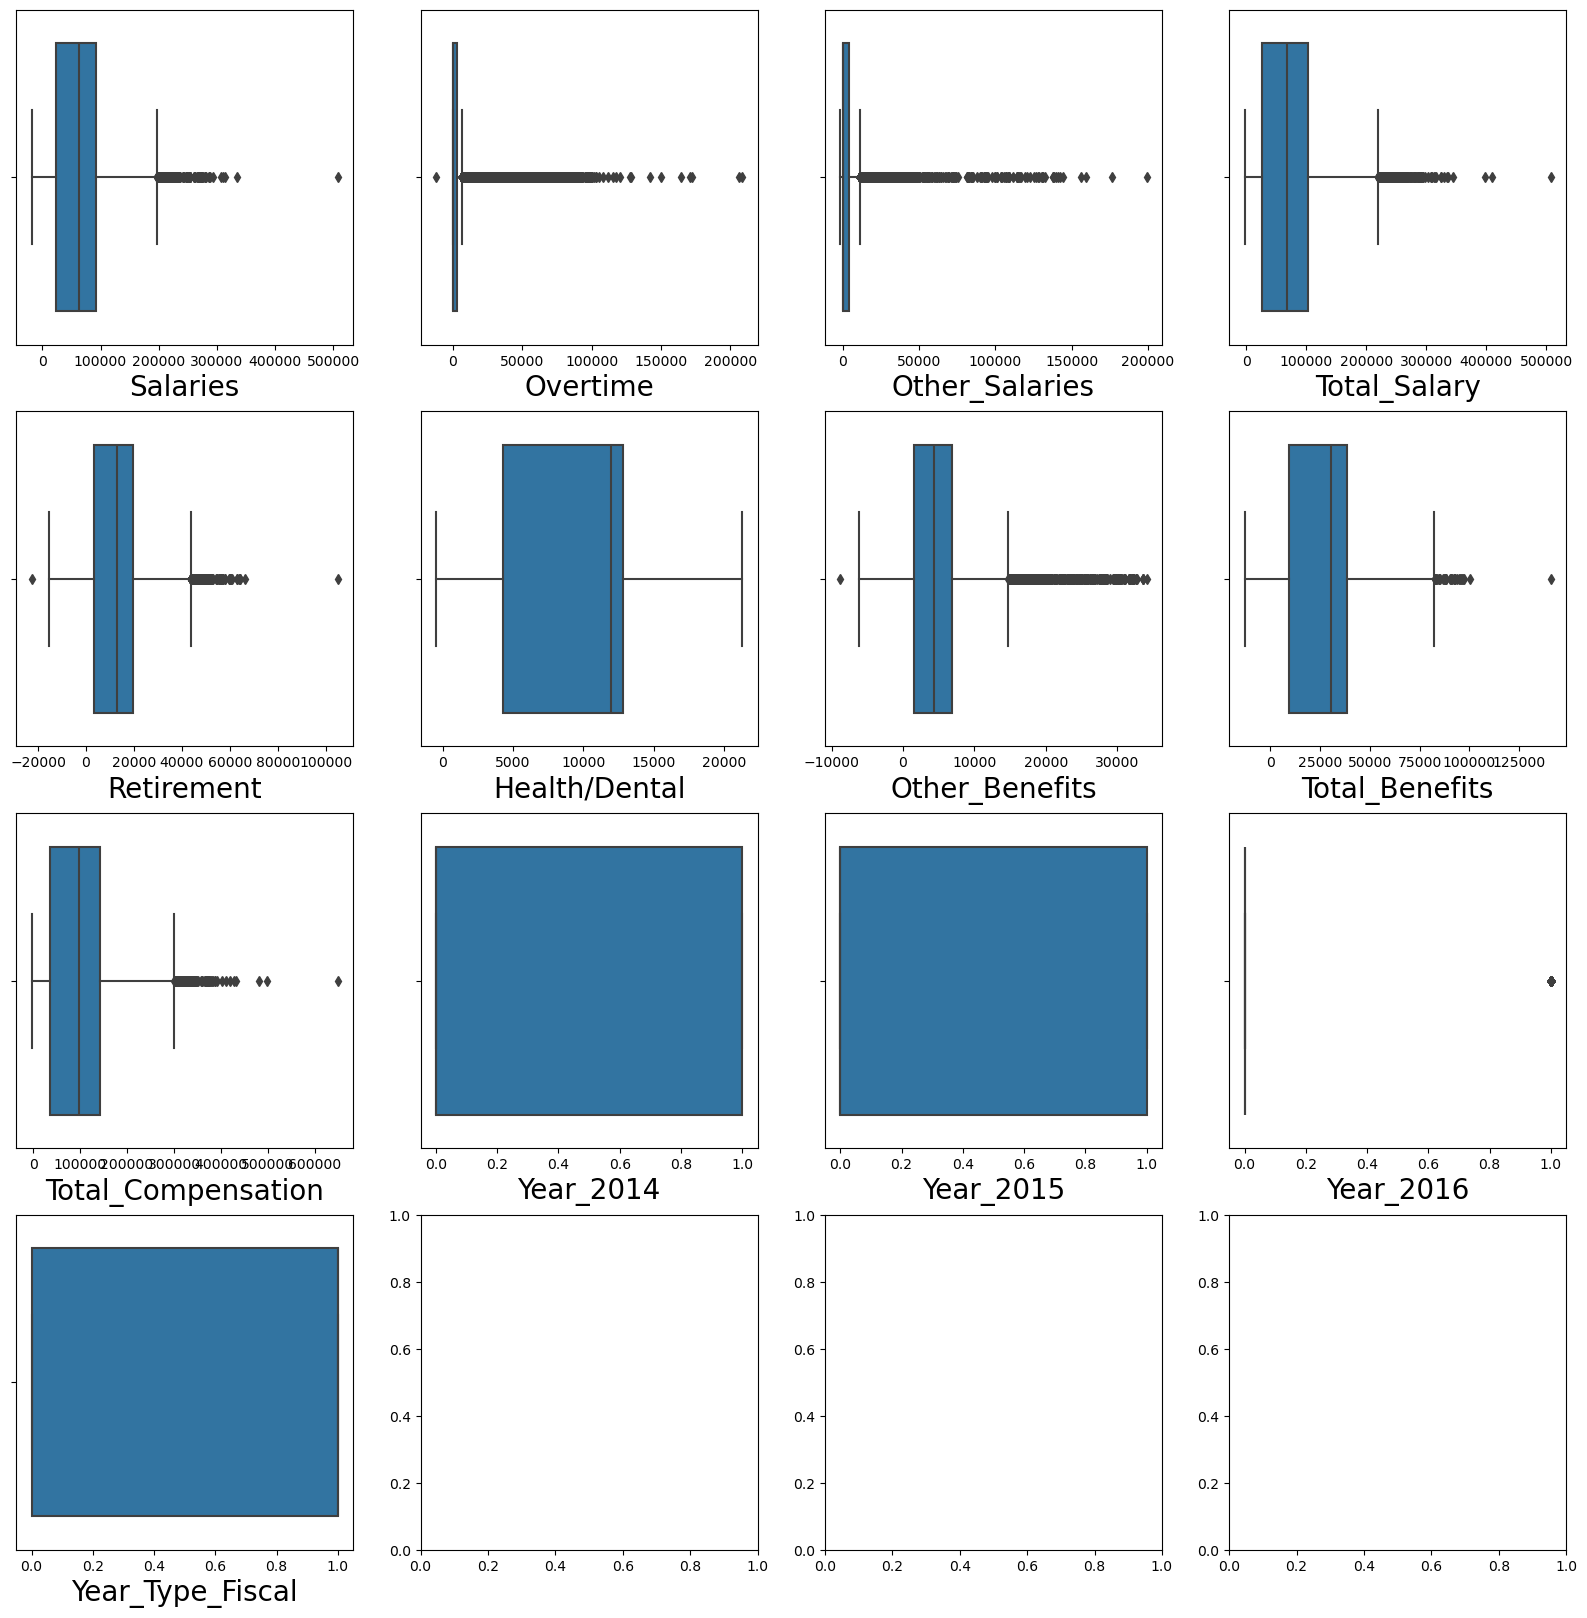

In [32]:
fig, ax = plt.subplots(4, 4, figsize=(20, 20))

for variable, subplot in zip(compensations.columns, ax.flatten()):
    z = sns.boxplot(x = compensations[variable], orient = "h",whis=1.5 , ax=subplot) # plot the boxplot
    z.set_xlabel(variable, fontsize = 20)                                   # set the x-axis label

## Outlier Treatment

In [26]:
data1 = compensations.iloc[:,:-4]

In [28]:
q1 = data1.quantile(0.25)
q3 = data1.quantile(0.75)

iqr = q3-q1
lb = q1 - 1.5*iqr
ub = q3 + 1.5*iqr


In [34]:
data2 = compensations[~((data1 < lb) | (data1 > ub)).any(axis=1)]
data2.head()

,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation,Year_2014,Year_2015,Year_2016,Year_Type_Fiscal
0,92288.22,267.45,267.45,92823.12,20700.20,12500.56,7605.75,40806.51,133629.63,0,1,0,1
1,1466.38,348.23,0.00,1814.61,0.00,442.03,141.59,583.62,2398.23,0,1,0,0
3,45659.88,0.00,1625.37,47285.25,10081.20,0.00,3936.63,14017.83,61303.08,1,0,0,1
4,41832.00,0.00,0.00,41832.00,7617.60,5908.52,3254.50,16780.62,58612.62,0,0,0,1
5,74132.00,0.00,1443.42,75575.42,14851.23,12888.34,6233.85,33973.42,109548.84,0,0,0,0


In [35]:
data2 = data2.reset_index(drop=True)
data2.head()

,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation,Year_2014,Year_2015,Year_2016,Year_Type_Fiscal
0,92288.22,267.45,267.45,92823.12,20700.20,12500.56,7605.75,40806.51,133629.63,0,1,0,1
1,1466.38,348.23,0.00,1814.61,0.00,442.03,141.59,583.62,2398.23,0,1,0,0
2,45659.88,0.00,1625.37,47285.25,10081.20,0.00,3936.63,14017.83,61303.08,1,0,0,1
3,41832.00,0.00,0.00,41832.00,7617.60,5908.52,3254.50,16780.62,58612.62,0,0,0,1
4,74132.00,0.00,1443.42,75575.42,14851.23,12888.34,6233.85,33973.42,109548.84,0,0,0,0


In [31]:
data2.isnull().sum()

Salaries              0
Overtime              0
Other_Salaries        0
Total_Salary          0
Retirement            0
Health/Dental         0
Other_Benefits        0
Total_Benefits        0
Total_Compensation    0
Year_2014             0
Year_2015             0
Year_2016             0
Year_Type_Fiscal      0
dtype: int64

## Scaling

In [36]:
from sklearn.preprocessing import  StandardScaler

sc = StandardScaler()

data_sc = sc.fit_transform(data2.iloc[:,:-4])

data_sc = pd.DataFrame(data_sc, columns=data2.iloc[:,:-4].columns)
data_sc.head()

<IPython.core.display.Javascript object>

,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation
0,0.983501,-0.228094,-0.474925,0.926924,1.178509,0.916577,1.145330,1.160937,1.001741
1,-1.252282,-0.167554,-0.587284,-1.263232,-1.180545,-1.491481,-1.259987,-1.365209,-1.304489
2,-0.164360,-0.428531,0.095552,-0.168963,-0.031662,-1.579754,-0.037040,-0.521491,-0.269309
3,-0.258592,-0.428531,-0.587284,-0.300198,-0.312421,-0.399837,-0.256855,-0.347977,-0.316591
4,0.536545,-0.428531,0.019113,0.511851,0.511944,0.994015,0.703237,0.731794,0.578551


In [37]:
data_final = pd.concat([data_sc, data2.iloc[:, -4:]], axis=1)
data_final.head()

<IPython.core.display.Javascript object>

,Salaries,Overtime,Other_Salaries,Total_Salary,Retirement,Health/Dental,Other_Benefits,Total_Benefits,Total_Compensation,Year_2014,Year_2015,Year_2016,Year_Type_Fiscal
0,0.983501,-0.228094,-0.474925,0.926924,1.178509,0.916577,1.145330,1.160937,1.001741,0,1,0,1
1,-1.252282,-0.167554,-0.587284,-1.263232,-1.180545,-1.491481,-1.259987,-1.365209,-1.304489,0,1,0,0
2,-0.164360,-0.428531,0.095552,-0.168963,-0.031662,-1.579754,-0.037040,-0.521491,-0.269309,1,0,0,1
3,-0.258592,-0.428531,-0.587284,-0.300198,-0.312421,-0.399837,-0.256855,-0.347977,-0.316591,0,0,0,1
4,0.536545,-0.428531,0.019113,0.511851,0.511944,0.994015,0.703237,0.731794,0.578551,0,0,0,0


In [39]:
X, Y = data_final.drop(columns=['Total_Compensation']), data2.Total_Compensation
# here we have considered the Y from data2 since data_sc contains scaled version of compensation to over come it we are using data2.

In [40]:
import statsmodels.api as sm

Xc = sm.add_constant(X)
ols = sm.OLS(Y, Xc)
ols_mod = ols.fit()

ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Total_Compensation   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.453e+33
Date:                Sun, 21 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:13:15   Log-Likelihood:             8.1832e+05
No. Observations:               37721   AIC:                        -1.637e+06
Df Residuals:                   37710   BIC:                        -1.637e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             7.663e+04   1.05e-12   7.33e+16      0.000    7.66e+04    7.66e+04
Salaries          2.073e+04   9.22e-13   2.25e+16      0.000    2.07e+04    2.07e+04
Overtime           680.7894   5.09e-13   1.34e+15      0.000     680.789     680.789
Other_Salaries    1214.4609   5.19e-13   2.34e+15      0.000    1214.461    1214.461
Total_Salary      2.035e+04   8.97e-13   2.27e+16      0.000    2.04e+04    2.04e+04
Retirement        6091.1128   1.39e-12   4.37e+15      0.000    6091.113    6091.113
Health/Dental     3476.0609    8.9e-13   3.91e+15      0.000    3476.061    3476.061
Other_Benefits    2154.1132   1.01e-12   2.12e+15      0.000    2154.113    2154.113
Total_Benefits    4869.7666   6.38e-13   7.63e+15      0.000    4869.767    4869.767
Year_2014        -2.572e-11   1.29e-12    -19.942      0.000   -2.82e-11   -2.32e-11
Year_2015        -3.354e-11   1.29e-12    -26.061      0.000   -3.61e-11    -3.1e-11
Year_2016        -2.547e-11    1.6e-12    -15.911      0.000   -2.86e-11   -2.23e-11
Year_Type_Fiscal  9.692e-12   1.02e-12      9.462      0.000    7.68e-12    1.17e-11
==============================================================================
Omnibus:                    31256.935   Durbin-Watson:                   1.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2236.885
Skew:                          -0.002   Prob(JB):                         0.00
Kurtosis:                       1.807   Cond. No.                     2.08e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.91e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### Notes
* Durbin Watson tells about autocorrelation
* Cond No: this should be less than 1000, else its multi collinearity.
* and the input is 100% explained since we have got `R-squared, Prob (F-statistic)`

Reciduals are not normally distributed - Null Hypothesis can be rejected.

**This concludes that its not worthy to bhelieve on this model**

In [41]:
compensations.shape

(50000, 13)

In [42]:
from statsmodels.stats.outliers_influence import  variance_inflation_factor

In [43]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['Feature'] = X.columns
vif.sort_values('VIF', ascending=False)

<IPython.core.display.Javascript object>

c:\Users\lokesh\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF,Feature
0,inf,Salaries
1,inf,Overtime
2,inf,Other_Salaries
3,inf,Total_Salary
4,inf,Retirement
5,inf,Health/Dental
6,inf,Other_Benefits
7,inf,Total_Benefits
11,2.065337,Year_Type_Fiscal
10,1.545000,Year_2016


In [44]:
X1 = X.drop('Salaries', axis=1)

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['Feature'] = X1.columns
vif.sort_values('VIF', ascending=False)

<IPython.core.display.Javascript object>

c:\Users\lokesh\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,VIF,Feature
3,inf,Retirement
4,inf,Health/Dental
5,inf,Other_Benefits
6,inf,Total_Benefits
2,15.008804,Total_Salary
10,2.065337,Year_Type_Fiscal
9,1.545000,Year_2016
8,1.300030,Year_2015
7,1.283136,Year_2014
1,1.271564,Other_Salaries


In [45]:
X1 = X1.drop('Retirement', axis=1)

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['Feature'] = X1.columns
vif.sort_values('VIF', ascending=False)

<IPython.core.display.Javascript object>

,VIF,Feature
5,43.035389,Total_Benefits
2,15.008804,Total_Salary
3,9.417625,Health/Dental
4,6.641277,Other_Benefits
9,2.065337,Year_Type_Fiscal
8,1.545000,Year_2016
7,1.300030,Year_2015
6,1.283136,Year_2014
1,1.271564,Other_Salaries
0,1.159517,Overtime


In [46]:
X1 = X1.drop('Total_Benefits', axis=1)

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['Feature'] = X1.columns
vif.sort_values('VIF', ascending=False)

<IPython.core.display.Javascript object>

,VIF,Feature
2,5.851542,Total_Salary
4,4.636811,Other_Benefits
3,3.185484,Health/Dental
8,2.050162,Year_Type_Fiscal
7,1.535738,Year_2016
6,1.266620,Year_2015
1,1.257714,Other_Salaries
5,1.252008,Year_2014
0,1.159510,Overtime


In [47]:
import statsmodels.api as sm

Xc = sm.add_constant(X1)
ols = sm.OLS(Y, Xc)
ols_mod = ols.fit()

ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Total_Compensation   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.342e+06
Date:                Sun, 21 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:11:55   Log-Likelihood:            -3.4719e+05
No. Observations:               37721   AIC:                         6.944e+05
Df Residuals:                   37711   BIC:                         6.945e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              7.59e+04     27.188   2791.782      0.000    7.59e+04     7.6e+04
Overtime             1.5956     13.335      0.120      0.905     -24.542      27.733
Other_Salaries    -283.7050     13.888    -20.429      0.000    -310.925    -256.485
Total_Salary       4.89e+04     29.955   1632.492      0.000    4.88e+04     4.9e+04
Health/Dental     6073.4216     22.108    274.722      0.000    6030.090    6116.753
Other_Benefits    3430.4728     26.666    128.648      0.000    3378.207    3482.738
Year_2014         1349.5995     33.117     40.752      0.000    1284.689    1414.510
Year_2015         1369.4921     33.017     41.479      0.000    1304.779    1434.205
Year_2016         -233.1735     41.971     -5.556      0.000    -315.437    -150.910
Year_Type_Fiscal   -40.4212     26.872     -1.504      0.133     -93.091      12.248
==============================================================================
Omnibus:                    23912.661   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1812097.420
Skew:                          -2.274   Prob(JB):                         0.00
Kurtosis:                      36.649   Cond. No.                         7.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<IPython.core.display.Javascript object>

<Axes: xlabel='Total_Compensation'>

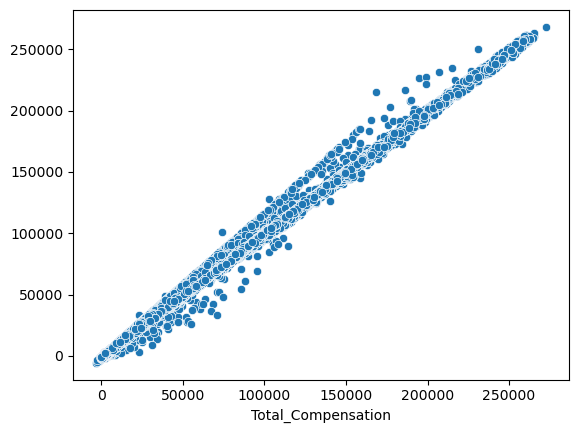

In [49]:
ypred = ols_mod.predict()

sns.scatterplot(x=Y, y=ypred)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

c:\Users\lokesh\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


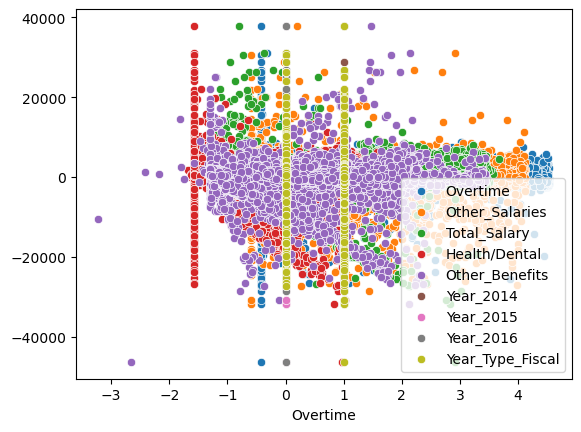

In [53]:
for i in X1.columns:
    sns.scatterplot(x=X1[i],y= ols_mod.resid)
plt.legend(X1.columns)

In [54]:
from statsmodels.stats.diagnostic import linear_rainbow

In [55]:
linear_rainbow(res=ols_mod, frac=0.5)
# H0: part of the data is linear, i.e 50%
# H1: even 50% of data is not linear 

(0.9963561456138164, 0.5989512641677408)

<IPython.core.display.Javascript object>

C:\Users\lokesh\AppData\Local\Temp\ipykernel_16948\2613488039.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ols_mod.resid)
c:\Users\lokesh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

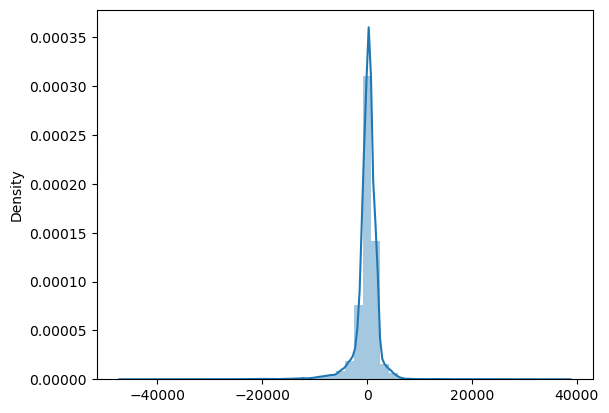

In [56]:
sns.distplot(ols_mod.resid)

In [57]:
ols_mod.resid.skew()

-2.274576175889527

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

((array([-4.12701073, -3.91821603, -3.80426286, ...,  3.80426286,
          3.91821603,  4.12701073]),
  array([-46349.47386685, -31896.96538844, -30893.46480643, ...,
          30536.62916981,  31016.88996381,  37879.74648887])),
 (2026.6984780577711, 1.7900849050349704e-10, 0.8427161692001346))

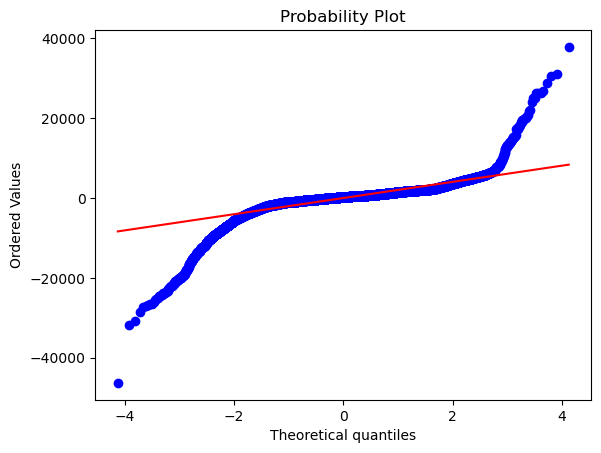

In [58]:
import scipy.stats as stats
stats.probplot(ols_mod.resid, plot=plt)

In [59]:
Y.describe()

count     37721.000000
mean      76627.575881
std       56903.754957
min       -3518.340000
25%       21211.800000
50%       80608.920000
75%      115231.110000
max      272895.060000
Name: Total_Compensation, dtype: float64

In [61]:
Yabs = np.abs(Y)
Yabs.describe()

<IPython.core.display.Javascript object>

count     37721.000000
mean      76628.355130
std       56902.705564
min           0.290000
25%       21211.800000
50%       80608.920000
75%      115231.110000
max      272895.060000
Name: Total_Compensation, dtype: float64

In [62]:
# to fix the skewness make the trial and error until we get the skewness to 0
Yabs = np.power(Yabs, 0.7) # for this given 
Yabs.skew()

<IPython.core.display.Javascript object>

0.001916029754333152

In [63]:
Xc = sm.add_constant(X1)
ols = sm.OLS(Yabs, Xc)
ols_mod = ols.fit()

ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Total_Compensation   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 4.030e+05
Date:                Sun, 21 Jul 2024   Prob (F-statistic):               0.00
Time:                        17:41:33   Log-Likelihood:            -2.4169e+05
No. Observations:               37721   AIC:                         4.834e+05
Df Residuals:                   37711   BIC:                         4.835e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2413.4103      1.658   1455.226      0.000    2410.160    2416.661
Overtime            11.9698      0.813     14.715      0.000      10.375      13.564
Other_Salaries      23.3904      0.847     27.612      0.000      21.730      25.051
Total_Salary       989.2782      1.827    541.423      0.000     985.697     992.860
Health/Dental      358.8735      1.349    266.123      0.000     356.230     361.517
Other_Benefits     148.9871      1.627     91.597      0.000     145.799     152.175
Year_2014           30.6724      2.020     15.184      0.000      26.713      34.632
Year_2015           39.8592      2.014     19.792      0.000      35.912      43.807
Year_2016          -10.9112      2.560     -4.262      0.000     -15.929      -5.893
Year_Type_Fiscal    -2.6032      1.639     -1.588      0.112      -5.816       0.610
==============================================================================
Omnibus:                     2939.283   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8391.857
Skew:                           0.426   Prob(JB):                         0.00
Kurtosis:                       5.148   Cond. No.                         7.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
ols_mod.resid.skew()

0.4259833748432255

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

((array([-4.12701073, -3.91821603, -3.80426286, ...,  3.80426286,
          3.91821603,  4.12701073]),
  array([-778.29341226, -776.49991454, -757.58984121, ..., 1118.54305609,
         1194.45307728, 1282.98174559])),
 (144.94451557632604, 5.4348784012559165e-12, 0.9880441508407529))

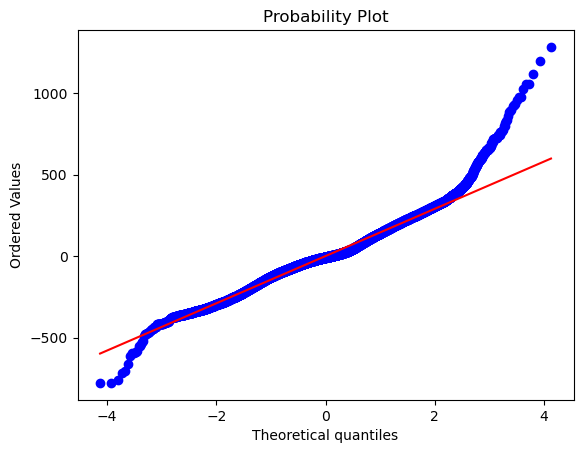

In [65]:
stats.probplot(ols_mod.resid, plot=plt)

<IPython.core.display.Javascript object>

<Axes: >

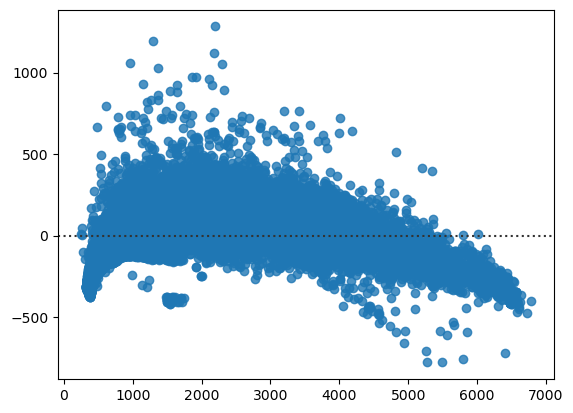

In [67]:
# Homoscedasticity

sns.residplot(x=ols_mod.predict(), y=ols_mod.resid)

In [68]:
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Total_Compensation   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 4.030e+05
Date:                Sun, 21 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:00:39   Log-Likelihood:            -2.4169e+05
No. Observations:               37721   AIC:                         4.834e+05
Df Residuals:                   37711   BIC:                         4.835e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2413.4103      1.658   1455.226      0.000    2410.160    2416.661
Overtime            11.9698      0.813     14.715      0.000      10.375      13.564
Other_Salaries      23.3904      0.847     27.612      0.000      21.730      25.051
Total_Salary       989.2782      1.827    541.423      0.000     985.697     992.860
Health/Dental      358.8735      1.349    266.123      0.000     356.230     361.517
Other_Benefits     148.9871      1.627     91.597      0.000     145.799     152.175
Year_2014           30.6724      2.020     15.184      0.000      26.713      34.632
Year_2015           39.8592      2.014     19.792      0.000      35.912      43.807
Year_2016          -10.9112      2.560     -4.262      0.000     -15.929      -5.893
Year_Type_Fiscal    -2.6032      1.639     -1.588      0.112      -5.816       0.610
==============================================================================
Omnibus:                     2939.283   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8391.857
Skew:                           0.426   Prob(JB):                         0.00
Kurtosis:                       5.148   Cond. No.                         7.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
# here if the overtime is increased by one unit then the total compensation is going to increase by 34.68 $ dollars
np.power(11.9698, 1/0.7)

<IPython.core.display.Javascript object>

34.683597228546525

In [71]:
ols_mod.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                    Results: Ordinary least squares
========================================================================
Model:                OLS                Adj. R-squared:     0.990      
Dependent Variable:   Total_Compensation AIC:                483392.7573
Date:                 2024-07-21 18:03   BIC:                483478.1370
No. Observations:     37721              Log-Likelihood:     -2.4169e+05
Df Model:             9                  F-statistic:        4.030e+05  
Df Residuals:         37711              Prob (F-statistic): 0.00       
R-squared:            0.990              Scale:              21522.     
------------------------------------------------------------------------
                   Coef.   Std.Err.     t     P>|t|    [0.025    0.975] 
------------------------------------------------------------------------
const            2413.4103   1.6584 1455.2257 0.0000 2410.1597 2416.6609
Overtime           11.9698   0.8134   14.7152 0.0000   10.3754   13.5641
Other_Salaries     23.3904   0.8471   27.6118 0.0000   21.7300   25.0507
Total_Salary      989.2782   1.8272  541.4226 0.0000  985.6969  992.8595
Health/Dental     358.8735   1.3485  266.1235 0.0000  356.2303  361.5166
Other_Benefits    148.9871   1.6266   91.5965 0.0000  145.7990  152.1752
Year_2014          30.6724   2.0201   15.1837 0.0000   26.7130   34.6319
Year_2015          39.8592   2.0140   19.7916 0.0000   35.9118   43.8066
Year_2016         -10.9112   2.5601   -4.2620 0.0000  -15.9292   -5.8933
Year_Type_Fiscal   -2.6032   1.6391   -1.5882 0.1123   -5.8159    0.6096
------------------------------------------------------------------------
Omnibus:               2939.283        Durbin-Watson:           1.992   
Prob(Omnibus):         0.000           Jarque-Bera (JB):        8391.857
Skew:                  0.426           Prob(JB):                0.000   
Kurtosis:              5.148           Condition No.:           7       
========================================================================
Notes:
[1] Standard Errors assume that the covariance matrix of the errors is
correctly specified.
"""